# To Do

- Unprocessed Data -- DONE \
- Normalized Data (w/o occlusion removal) --DONE \
- After Occlusion Removal (Removal of half warna parabola fitting)\
- Maybe - \
- Median Filtered (on normalized data) \
- Hist. Eq - CLAHE (on normalized data) \
- Median Filtered (on occ rem data) \
- Hist. Eq - CLAHE (on occ rem data) \
- OCC REM - FACTOR for top part -> need to make global variable -- DONE

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# IIT Delhi Dataset - Used in Paper

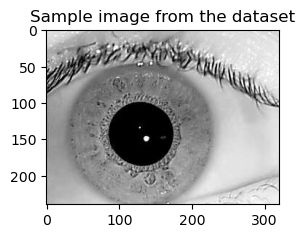

In [2]:
# Getting the IIT Delhi dataset

path = '../Images/IITD Database'
# print(os.listdir(path))
test_img = path + "/001/01_L.bmp"

img = cv2.imread(test_img, 0)
fig = plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray')
plt.title("Sample image from the dataset")
plt.show()

In [3]:
dataset_directory = path

data = []

# Loading the data
i = 1
for person_folder in os.listdir(dataset_directory):
    person_folder_path = os.path.join(dataset_directory, person_folder)
    if os.path.isdir(person_folder_path) and person_folder != 'Normalized_Images':
        for image_file in os.listdir(person_folder_path): # if there exists a file inside the folder
            if image_file.endswith('.bmp'):
                image_path = os.path.join(person_folder_path, image_file)
                if i%100 == 0:
                  print(i)
                i += 1
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # reading in grayscale
                data.append({'person': person_folder, 'image_data': image})

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


In [4]:
df = pd.DataFrame(data)
df.head()

,person,image_data
0,187,"[[223, 156, 150, 161, 149, 145, 142, 143, 142,..."
1,187,"[[0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,..."
2,187,"[[5, 0, 3, 29, 32, 2, 0, 6, 0, 1, 14, 4, 0, 5,..."
3,187,"[[223, 173, 165, 139, 136, 135, 139, 128, 126,..."
4,187,"[[221, 140, 145, 124, 164, 148, 223, 159, 128,..."


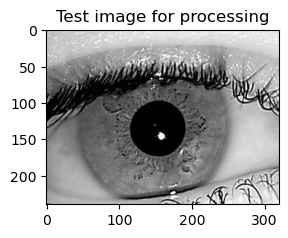

In [5]:
test_img = df['image_data'][12]
fig = plt.figure(figsize=(3, 3))
plt.imshow(test_img, cmap='gray')
plt.title("Test image for processing")
plt.show()

# PCA and LDA (classification)

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


def PCA_LDA(df, n_pca, n_step, column):
  n_classes = len(np.unique(df['person']))
  data = np.asarray(df[column].tolist())
  print(data.shape)
  data =data.reshape(data.shape[0], data.shape[1]*data.shape[2])
  X_train, X_test, y_train, y_test = train_test_split(data, df['person'], test_size=0.2, random_state=42)
  num_components_pca = n_pca
  # Apply PCA on dataset
  pca = PCA(n_components=num_components_pca)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)

  accuracy = []
  precision = []
  recall = []
  f1 = []
  num_features =[]

  for i in range(3, num_components_pca, n_step):
    num_features.append(i)
    num_components_lda = min(n_classes - 1, i)
    # Apply LDA on dataset
    lda = LinearDiscriminantAnalysis(n_components=num_components_lda)
    # Fit LDA on the training set
    X_train_lda = lda.fit_transform(X_train_pca[:,:i], y_train)
    # Transform the test set using LDA
    X_test_lda = lda.transform(X_test_pca[:,:i])
    # Predict the labels using LDA
    y_pred = lda.predict(X_test_pca[:,:i])
    # print accuracy
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred, average='macro', zero_division=1))
    recall.append(recall_score(y_test, y_pred, average='macro', zero_division=1))
    f1.append(f1_score(y_test, y_pred, average='macro', zero_division=1))
    # print("Accuracy: ", accuracy_score(y_test, y_pred))

  # plt.plot(num_features, accuracy)
  # plt.title('Accuracy vs Num Features')
  # plt.show()
  return num_features, accuracy, precision, recall, f1

In [7]:
# print(X_train_pca.shape)
# print(X_test_pca.shape)
# print(n_classes)
# test= X_train_pca[:,:100]
# print(test.shape)

(61, 240, 320)
7 2 2


Text(0.5, 1.0, 'LDA Projection of 3 classes')

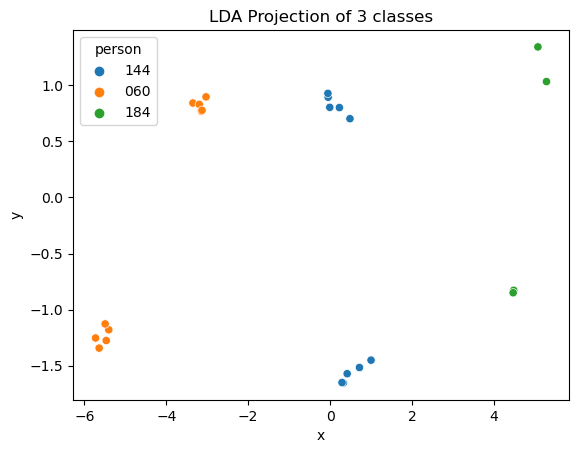

In [78]:
def PCA_LDA_2(df, n_pca, n_step):
    n_classes = len(np.unique(df['person']))
    data = np.asarray(df['image_data'].tolist())
    print(data.shape)
    data =data.reshape(data.shape[0], data.shape[1]*data.shape[2])
    X_train, X_test, y_train, y_test = train_test_split(data, df['person'], test_size=0.1, random_state=42, shuffle=False)
    num_components_pca = n_pca
    # Apply PCA on dataset
    pca = PCA(n_components=num_components_pca)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    accuracy = []
    num_features =[]

    i = num_components_pca
    num_features.append(i)
    num_components_lda = min(n_classes - 1, i)
    print(n_classes, i, num_components_lda)
    # Apply LDA on dataset
    lda = LinearDiscriminantAnalysis(n_components=2)
    # Fit LDA on the training set
    X_train_lda = lda.fit_transform(X_train_pca[:,:i], y_train)
    # Transform the test set using LDA
    X_test_lda = lda.transform(X_test_pca[:,:i])
    # Predict the labels using LDA
    y_pred = lda.predict(X_test_pca[:,:i])
    # print accuracy    
    accuracy.append(accuracy_score(y_test, y_pred))
    # print("Accuracy: ", accuracy_score(y_test, y_pred))

    # plt.plot(num_features, accuracy)
    # plt.title('Accuracy vs Num Features')
    # plt.show()
    return X_train_lda, X_test_lda, y_train, y_test, num_features, accuracy, lda

df_plot = df.loc[:60]
train, test, ytr, ytst, num_features, accuracy, lda = PCA_LDA_2(df_plot, 2, 1)
df_lda = pd.DataFrame(train, columns=['x', 'y'])
df_lda['person'] = ytr

# remove row if ytr == 132, 103, 157
df_lda.drop(df_lda[df_lda['person'] == '187'].index, inplace = True)
df_lda.drop(df_lda[df_lda['person'] == '162'].index, inplace = True)
df_lda.drop(df_lda[df_lda['person'] == '050'].index, inplace = True)


sns.scatterplot(x='x', y='y', hue='person', data=df_lda)
plt.title('LDA Projection of 3 classes')
# X_train = df_lda[['x', 'y']].values
# y_train = np.array([int(i) for i in df_lda['person'].values])
# print(X_train.dtype)
# print(X_train.shape, y_train.shape)
# plot_decision_regions(X_train, y_train, clf=lda, legend=2)



In [79]:
PCA_LDA(df, 50, 10, 'image_data')

(2240, 240, 320)


([3, 13, 23, 33, 43],
 [0.08928571428571429,
  0.625,
  0.7522321428571429,
  0.7879464285714286,
  0.8325892857142857],
 [0.5013419913419913,
  0.7078703703703703,
  0.8121406109613657,
  0.8254492362982928,
  0.851606019766397],
 [0.18742424242424244,
  0.6624228395061729,
  0.7867924528301887,
  0.8235062893081762,
  0.8638364779874214],
 [0.42594877344877347,
  0.6379482657260435,
  0.7068616917673521,
  0.740249190013341,
  0.7991671588369701])

# Pre Processing

- was using 9 samples 46 classes for now on MMU dataset
- using IITD dataset as provided in paper- 224 classes 10 images in each class
- Part 1 Goals
    - Outline steps for paper d
    - Choose dataset d
    - Load dataset d
    - pupil segmentation d
    - iris segmentation d
    - iris normalization d
    - occlusion removal d

- Part 2 Goals
    - PCA Training d
    - LDA Training d
    - Iris Recognition Testing d
    - Inference of Results(on Dimensionality, Occlusion Techniques) d
    - Improvements to make (if any)

## A. Pupil Segmentation

In [82]:
# def find_pupil(image):

#     imTemp = image.copy()
#     _, thresholded_image = cv2.threshold(image, 25, 255, cv2.THRESH_BINARY_INV)
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
#     morphed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_OPEN, kernel)
#     contours, _ = cv2.findContours(morphed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#     largest_contour = max(contours, key=cv2.contourArea)

#     ellipse = cv2.fitEllipse(largest_contour)

#     ellipse_image = image.copy()
#     ellipse_image = cv2.cvtColor(ellipse_image, cv2.COLOR_GRAY2BGR)
#     pupil_image = cv2.ellipse(ellipse_image, ellipse, (255, 0, 0), 2)

#     mask = np.zeros_like(imTemp, dtype=np.uint8)
#     cv2.ellipse(mask, (ellipse[0], (ellipse[1][0], ellipse[1][1]), ellipse[2]), (255, 255, 255), -1)  # -1 fills the ellipse
#     pupilROI = cv2.bitwise_and(imTemp, mask)

#     return pupil_image, ellipse, pupilROI

def find_pupil(image):
    im_temp = image.copy()

    # Invert the image
    inverted_image = cv2.bitwise_not(im_temp)

    # Binarize the inverted image using a threshold of 0.9
    _, binary_image = cv2.threshold(inverted_image, 230, 255, cv2.THRESH_BINARY)

    # Erode the binary image to remove connections between iris and eyelashes
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    eroded_image = cv2.erode(binary_image, kernel, iterations=1)

    # Find contours in the eroded image
    contours, _ = cv2.findContours(eroded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours (noise)
    min_contour_area = 100
    large_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    if large_contours:
        # Identify the largest connected region as the pupil
        largest_contour = max(large_contours, key=cv2.contourArea)

        ellipse = cv2.fitEllipse(largest_contour)
        ellipse_image = image.copy()
        ellipse_image = cv2.cvtColor(ellipse_image, cv2.COLOR_GRAY2BGR)
        pupil_image = cv2.ellipse(ellipse_image, ellipse, (255, 0, 0), 2)

        mask = np.zeros_like(im_temp, dtype=np.uint8)
        cv2.ellipse(mask, (ellipse[0], (ellipse[1][0], ellipse[1][1]), ellipse[2]), (255, 255, 255), -1)  # -1 fills the ellipse
        pupilROI = cv2.bitwise_and(im_temp, mask)

        return pupil_image, ellipse, pupilROI

    else:
        return im_temp, None, None

def show_pupil(pupil_image, pupilROI):
    fig = plt.figure(figsize=(5, 5))
    plt.subplot(1,2,1)
    plt.imshow(pupil_image)
    plt.title("Detected pupil")

    plt.subplot(1,2,2)
    plt.imshow(pupilROI,cmap='gray')
    plt.title("Detected ROI (pupil)")
    plt.tight_layout()
    plt.show()

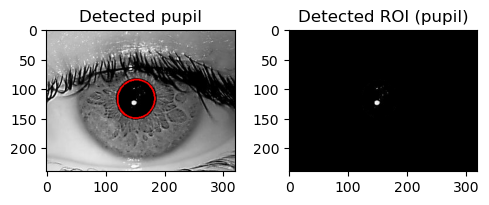

In [83]:
pupil_image, ellipse, pupilROI = find_pupil(test_img)
show_pupil(pupil_image, pupilROI)

## B. Iris Segmentation

In [84]:
def iris_segmentation(inIm, outIm, pupilDiameter, pupilCentre): # outIm is the image where we want to show iris contours
    image = inIm.copy() # inIm is the image where we detect contours from
    imageOut = outIm.copy()

    if len(imageOut.shape) == 2: # Converting to RGB as contour outlines are coloured
        imageOut = cv2.cvtColor(imageOut, cv2.COLOR_GRAY2BGR)


    gamma = 3 # gamma correction to increase contrast
    image = np.power(image / 255.0, gamma)
    image = np.uint8(image * 255)

    image = cv2.equalizeHist(image) # set image to high contrast

    image = cv2.GaussianBlur(image, (9, 9), 4) # gaussian blurring to remove noise

    # Use the Hough Circle Transform to detect circles in the image
    circles = cv2.HoughCircles(
        image,
        cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30,
        minRadius=int(pupilDiameter*1.05), # Minimum radius is set to slightly bigger than pupil radius as iris is bigger than pupil
        maxRadius=int(pupilDiameter*2) # Maxmium threshold for iris radius
    )

    # applying detected circles / circular contours on the output image
    if circles is not None:
        circles = np.uint16(np.around(circles))

        closest_centre = circles[0, 0, 0:2]
        closest_radius = circles[0, 0, 2]
        closest_distance = 10000

        for circle in circles[0, :]:
            center = (circle[0], circle[1])
            radius = circle[2]
            distance = np.sqrt((center[0] - pupilCentre[0])**2 + (center[1] - pupilCentre[1])**2)

            if distance < closest_distance:
                closest_centre = center
                closest_radius = radius
                closest_distance = distance
        # print(closest_centre)
        cv2.circle(imageOut, closest_centre, closest_radius, (0, 255, 0), 2)
        # print("Iris was detected in the image")
        return imageOut, closest_centre, closest_radius
    else:
        # print("No iris detected in the image.")
        cv2.circle(imageOut, (int(pupilCentre[0]), int(pupilCentre[1])), int(pupilDiameter/2)*2, (0, 255, 0), 2)
        return imageOut, (int(pupilCentre[0]), int(pupilCentre[1])), int(pupilDiameter/2)*2
        # return None

def get_pupil_radius_centre(ellipse):
    # pupil radius is considered to be 0.5 of mean of major and minor axes of the pupil ellipse
    # pupil centre is the centre of the pupil ellipse
    return int(np.mean(ellipse[1])//2), ellipse[0]

def show_iris(pupil_image, irisImage):
    if irisImage is not None:
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plt.imshow(pupil_image,cmap='gray')
        plt.title("Input image")

        plt.subplot(1,2,2)
        plt.imshow(irisImage)
        plt.title("Iris segmentation output")

        plt.tight_layout()
        plt.show()


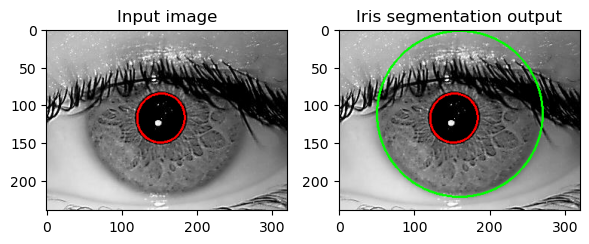

In [85]:
pupilRadius, pupilCentre = get_pupil_radius_centre(ellipse)
irisImage, iris_center, iris_radius = iris_segmentation(inIm=test_img, outIm=pupil_image, pupilDiameter=pupilRadius*2, pupilCentre=pupilCentre)
show_iris(pupil_image, irisImage)

In [13]:
# print(pupilRadius, iris_radius)

## C. Iris Normalization

In [86]:
# To View Steps

def get_iris_area_image(image, iris_center, iris_radius):
    iris_center = (int(iris_center[0]), int(iris_center[1]))
    image = image.copy()
    mask = np.zeros_like(image, dtype=np.uint8)
    cv2.circle(mask, iris_center, iris_radius, (255, 255, 255), -1)  # -1 fills the ellipse
    iris_area_image = cv2.bitwise_and(image, mask)
    return iris_area_image

# iris_area_image = get_iris_area_image(test_img, pupilCentre, iris_radius)
# plt.imshow(iris_area_image, cmap='gray')
# plt.title("Iris area image")
# plt.show()

def subtract_pupil_from_iris_area_image(iris_area_image, pupilROI):
    image = iris_area_image.copy()
    image = cv2.subtract(image, pupilROI)
    return image

# iris_area_image = subtract_pupil_from_iris_area_image(iris_area_image, pupilROI)
# plt.imshow(iris_area_image, cmap='gray')
# plt.title("Iris area image after subtracting pupil")
# plt.show()

def iris_normalize(img, pupil_center, pupil_radius, iris_radius):

    center_x, center_y = pupil_center

    height, width = round(iris_radius - pupil_radius), round(2 * np.pi * iris_radius)
    output_shape = (height, width)

    # Define the range of radii
    r = np.linspace(pupil_radius, iris_radius, height)

    # Define the range of angles
    theta = np.linspace(0, 2 * np.pi, width)

    # Create an empty output array
    flattened_iris = np.zeros(output_shape)

    for i in range(height):
        for j in range(width):
            x = round(r[i] * np.cos(theta[j]) + center_x)
            y = round(r[i] * np.sin(theta[j]) + center_y)

            if 0 <= x < img.shape[1] and 0 <= y < img.shape[0]:
                flattened_iris[i][j] = img[y][x]

    return flattened_iris

def show_normalized_iris(normalized_iris, irisImage):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.imshow(irisImage)
    plt.title("Iris segmentation output")

    plt.subplot(1,2,2)
    plt.imshow(normalized_iris, cmap='gray')
    plt.title("Normalized iris")
    plt.tight_layout()
    plt.show()


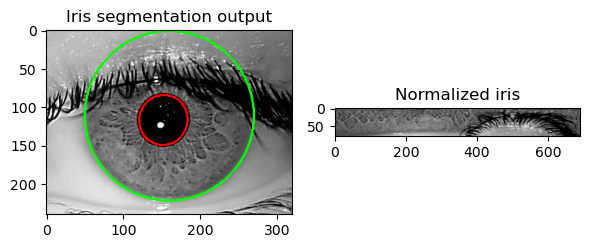

In [87]:
iris_normalized = iris_normalize(test_img, pupilCentre, pupilRadius, iris_radius)
show_normalized_iris(iris_normalized, irisImage)

## D. Occlusion Removal

In [88]:
FACTOR = 6

def occ_rem(iris_normalized):
    # Inverse the normalized iris image and convert to binary using a threshold T=0.9

    iris_normalized = 1 - iris_normalized
    iris_normalized = np.where(iris_normalized > 0.9, 1, 0)

    # Erode image using a circular structural element with radius 1, to remove spots in the iris and other outliers

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1))
    iris_normalized = cv2.erode(iris_normalized, kernel, iterations=1)

    # Remove any connected components with a total number of pixels less than 10, to further remove outliers

    iris_normalized = np.uint8(iris_normalized)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(iris_normalized, connectivity=8)
    for i in range(num_labels):
        if stats[i, cv2.CC_STAT_AREA] < 10:
            iris_normalized[labels == i] = 0

    # Dilate the image with a 4x4 square structural element

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4))
    iris_normalized = cv2.dilate(iris_normalized, kernel, iterations=1)

    iris_normalized = iris_normalized[len(iris_normalized)//FACTOR:]

    # getting arc with the top white spots in the image
    arc = np.zeros_like(iris_normalized)
    highest_y_coords = []
    for x in range(iris_normalized.shape[1]):
        column_values = iris_normalized[:, x]
        nonzero_indices = np.nonzero(column_values)[0]

        if len(nonzero_indices) > 0:
            highest_y_coords.append(np.min(nonzero_indices))
        else:
            highest_y_coords.append(-1)  # If no pixel value is 255, set y-coordinate to 0
    for i in range(len(highest_y_coords)):
        if (highest_y_coords[i] != -1):
          arc[highest_y_coords[i],i] = 1

    return arc

def show_occ(iris_normalized, occ_iris_normalized):
    # Create a figure to display the original and normalized images
    fig = plt.figure(figsize=(6, 3))

    # Original iris image
    plt.subplot(2, 1, 1)
    plt.imshow(iris_normalized, cmap='gray')
    plt.title("Normalized iris")

    # Normalized iris image
    plt.subplot(2, 1, 2)
    plt.imshow(occ_iris_normalized, cmap='gray')
    plt.title("Eyelash Detection")

    plt.show()



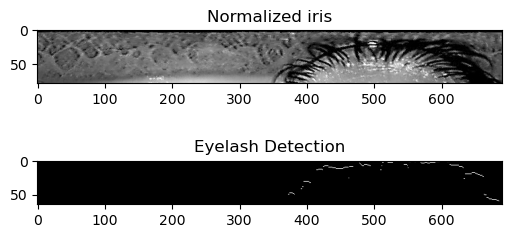

In [89]:
occ_iris_normalized = occ_rem(iris_normalized)
show_occ(iris_normalized, occ_iris_normalized)

In [90]:
def parabolaFitting(im):
    im = np.copy(im)
    x,y = np.where(im.T==1)
    # print(im.shape[1]//10)
    # print(len(x))
    if (len(x) <= im.shape[1]//10):
        return np.array([])
    y = im.T.shape[1] - y
    # plt.figure()
    # plt.plot(x,y)

    # Fit a polynomial of degree 2
    coefficients = np.polyfit(x, y, 2)

    # Generate y values using the fitted polynomial
    if coefficients[0] >= 0:
        return np.array([])
    # print(coefficients[0])
    y_fit = np.polyval(coefficients, x)

    # Plot the original data and the fitted polynomial
    # plt.scatter(x, y, label='Data')
    # plt.plot(x, y_fit, label='Fitted Polynomial', color='red')
    # plt.legend()
    # plt.show()

    x_all = np.arange(0,im.shape[1])
    y_fit_all = np.polyval(coefficients, x_all).astype(int)
    y_fit_all = im.T.shape[1] - y_fit_all
    y_fit_all[y_fit_all >= im.shape[0]] = 0

    im2 = np.zeros_like(im)
    im2[y_fit_all,x_all] = 1

    # To show parabola
    # plt.figure()
    # plt.imshow(im2,cmap = 'gray')

    return y_fit_all

In [19]:
# indices = parabolaFitting(occ_iris_normalized)

In [91]:
def occRemParabola(im,indices):
    if len(indices) == 0:
      return im
    targetIntensity = np.mean(im)
    im = np.copy(im)
    for i in range(im.shape[1]):
        if (indices[i] != 0):
          im[len(im)//FACTOR+indices[i]:,i] = targetIntensity

    # To show occlusion removed
    # plt.figure()
    # plt.imshow(im,cmap = 'gray')
    return im


In [21]:
# occRemParabola(iris_normalized,indices)

In [93]:
def final_occ_rem(im):
    left = im[:,:im.shape[1]//2]
    occ_im = occ_rem(left)
    show_occ(left, occ_im)
    indices = parabolaFitting(occ_im)
    final_l = occRemParabola(left,indices)
    right = im[:,im.shape[1]//2:]

    occ_im = occ_rem(right)
    show_occ(right, occ_im)
    indices = parabolaFitting(occ_im)
    final_r = occRemParabola(right,indices)

    final_im = np.hstack((final_l, final_r))
    # plt.figure()
    # plt.imshow(final_im, cmap='gray')

    return final_im

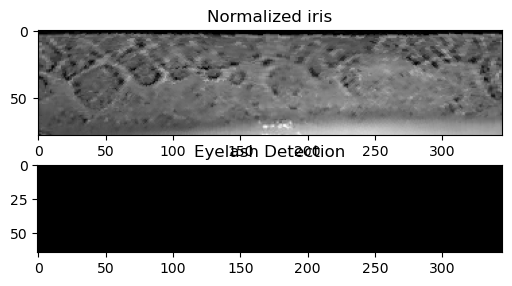

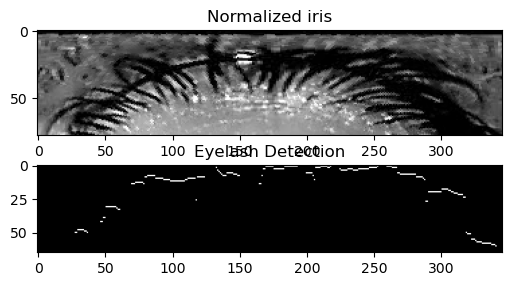

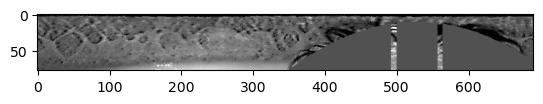

In [94]:
final_img = final_occ_rem(iris_normalized)

plt.figure()
plt.imshow(final_img, cmap='gray')

# Total Image Pre Processing

In [95]:
def total_processing(img):
  pupil_image, ellipse, pupilROI = find_pupil(img)
  # show_pupil(pupil_image, pupilROI)
  pupilRadius, pupilCentre = get_pupil_radius_centre(ellipse)
  irisImage, iris_center, iris_radius = iris_segmentation(inIm=img, outIm=pupil_image, pupilDiameter=pupilRadius*2, pupilCentre=pupilCentre)
  # show_iris(pupil_image, irisImage)
  iris_normalized = iris_normalize(img, pupilCentre, pupilRadius, iris_radius)
  # show_normalized_iris(iris_normalized, irisImage)
  # show_occ(iris_normalized, occ_iris_normalized)
  final_img = final_occ_rem(iris_normalized)
  return final_img

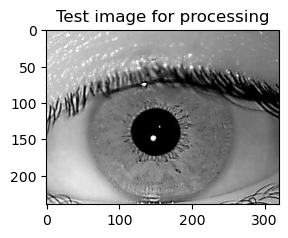

In [98]:
test_img = df['image_data'][200] # need to check occ rem not working for this
fig = plt.figure(figsize=(3, 3))
plt.imshow(test_img, cmap='gray')
plt.title("Test image for processing")
plt.show()

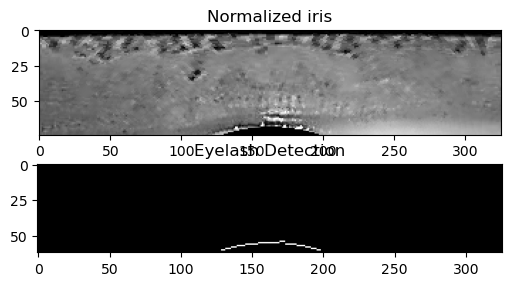

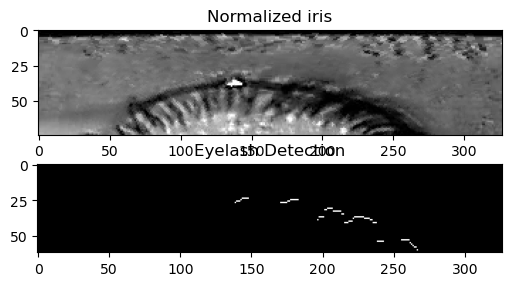

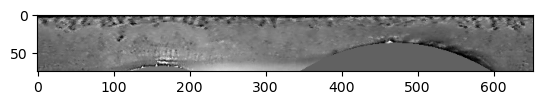

In [99]:
final_img = total_processing(test_img)

plt.figure()
plt.imshow(final_img, cmap='gray')

# Create Datasets for normal, occlusion removed data

In [27]:
def apply_median(img, kernel_size=5):
  input_img = np.clip(img, 0, 255).astype(np.uint8)
  median_filtered_image = cv2.medianBlur(input_img, kernel_size)
  return median_filtered_image

def apply_clahe(img, clip_limit=5.0, tile_grid_size=(8, 8)):
    input_img = np.clip(img, 0, 255).astype(np.uint8)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    clahe_result = clahe.apply(input_img)
    return clahe_result

In [28]:
# test_img = df_normal['image_data'][2000]
# fig = plt.figure(figsize=(10, 10))
# plt.imshow(test_img, cmap='gray')
# plt.title("Test image for processing")
# plt.show()

# # med_img = apply_median(test_img, 5
# fig = plt.figure(figsize=(10, 10))
# plt.imshow(med_img, cmap='gray')
# plt.title("Test image for processing")
# plt.show()

# med_img = apply_clahe(test_img)
# fig = plt.figure(figsize=(10, 10))
# plt.imshow(med_img, cmap='gray')
# plt.title("Test image for processing")
# plt.show()

In [29]:
def create_new_df(df):
  # Continue from normalized data, remember to resize so all images have same shape
  df_copy = df.copy()
  # df_copy = df.head(5).copy()
  i = 1
  normal_data = []
  normal_med_data = []
  normal_clahe_data = []
  occ_data = []
  occ_med_data = []
  occ_clahe_data = []

  for i in range(0, df.shape[0]):
    img = df['image_data'][i]
    pupil_image, ellipse, pupilROI = find_pupil(img)
    if ellipse is None:
      df_copy = df_copy.drop(i)
      continue
    pupilRadius, pupilCentre = get_pupil_radius_centre(ellipse)
    irisImage, iris_center, iris_radius = iris_segmentation(inIm=img, outIm=pupil_image, pupilDiameter=pupilRadius*2, pupilCentre=pupilCentre)
    iris_normalized = iris_normalize(img, pupilCentre, pupilRadius, iris_radius)
    final_img_normal = cv2.resize(iris_normalized, (650, 60))
    # df_copy['img_data_normalized'][i] = final_img_normal
    # df_copy['image_data_med'][i] = apply_median(final_img_normal, 5)
    # df_copy['image_data_clahe'][i] = apply_clahe(final_img_normal)
    normal_data.append(final_img_normal)
    normal_med_data.append(apply_median(final_img_normal, 5))
    normal_clahe_data.append(apply_clahe(final_img_normal))

    final_img = final_occ_rem(iris_normalized)
    final_img = cv2.resize(final_img, (650, 60))
    # df_copy['image_data_occ'][i] = final_img
    # df_copy['image_data_occ_med'][i] = apply_median(final_img, 5)
    # df_copy['image_data_occ_clahe'][i] = apply_clahe(final_img)
    occ_data.append(final_img)
    occ_med_data.append(apply_median(final_img, 5))
    occ_clahe_data.append(apply_clahe(final_img))
    if i%100==0:
      print(i)
    i+=1
  df_copy['image_data_normal'] = normal_data
  df_copy['image_data_normal_med'] = normal_med_data
  df_copy['image_data_normal_clahe'] = normal_clahe_data
  df_copy['image_data_occ'] = occ_data
  df_copy['image_data_occ_med'] = occ_med_data
  df_copy['image_data_occ_clahe'] = occ_clahe_data
  return df_copy

In [30]:
df_new = create_new_df(df)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


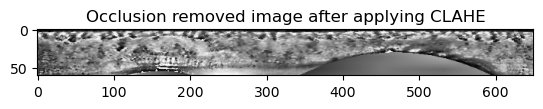

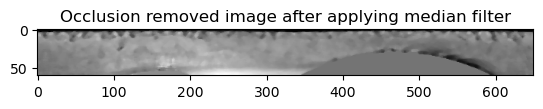

In [101]:
plt.title("Occlusion removed image after applying CLAHE")
plt.imshow(df_new['image_data_occ_clahe'][200], cmap='gray')
plt.show()
plt.title("Occlusion removed image after applying median filter")
plt.imshow(df_new['image_data_occ_med'][200], cmap='gray')
plt.show()

# Results

In [48]:
num_features, accuracy_0, precision_0, recall_0, f1_0 = PCA_LDA(df_new, 200, 5, 'image_data')
num_features, accuracy_1, precision_1, recall_1, f1_1 = PCA_LDA(df_new, 200, 5, 'image_data_normal')
num_features, accuracy_2, precision_2, recall_2, f1_2 = PCA_LDA(df_new, 200, 5, 'image_data_normal_med')
num_features, accuracy_3, precision_3, recall_3, f1_3 = PCA_LDA(df_new, 200, 5, 'image_data_normal_clahe')
num_features, accuracy_4, precision_4, recall_4, f1_4 = PCA_LDA(df_new, 200, 5, 'image_data_occ')
num_features, accuracy_5, precision_5, recall_5, f1_5 = PCA_LDA(df_new, 200, 5, 'image_data_occ_med')
num_features, accuracy_6, precision_6, recall_6, f1_6 = PCA_LDA(df_new, 200, 5, 'image_data_occ_clahe')


(2239, 240, 320)
(2239, 60, 650)
(2239, 60, 650)
(2239, 60, 650)
(2239, 60, 650)
(2239, 60, 650)
(2239, 60, 650)


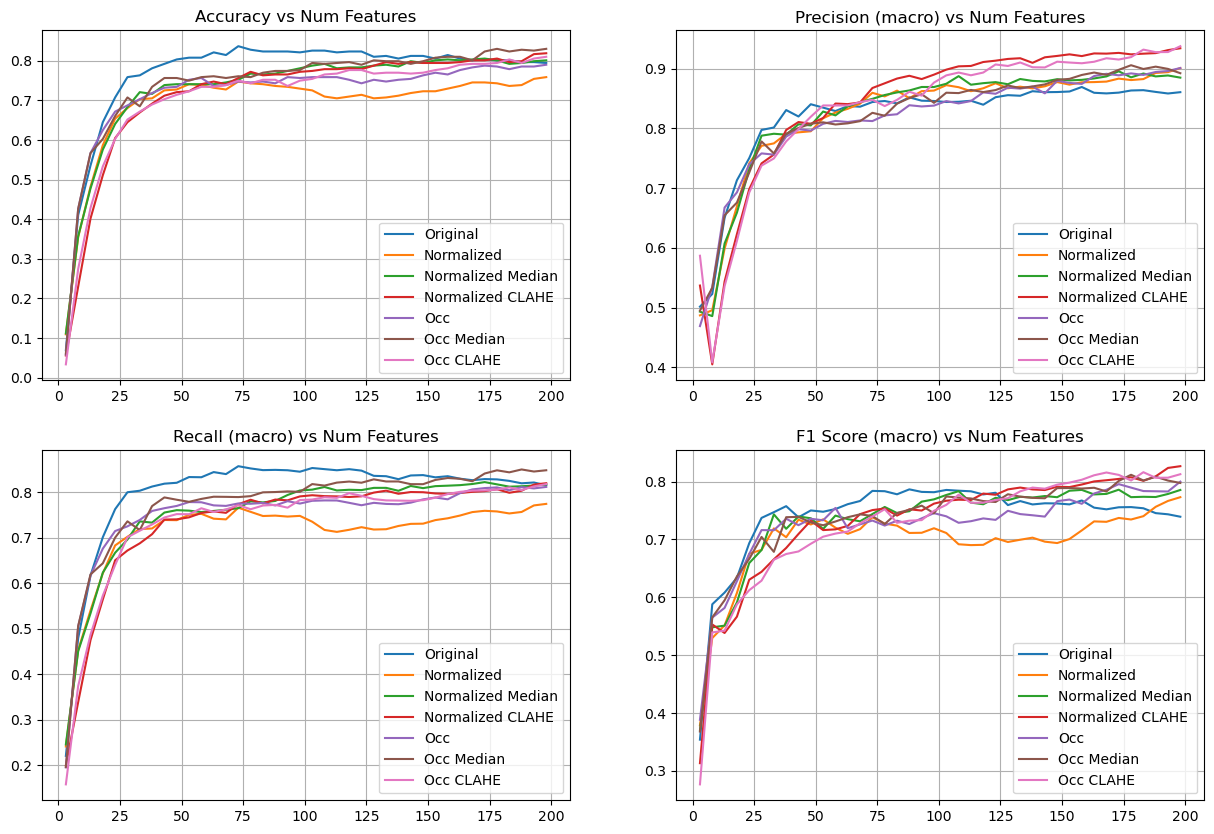

In [41]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(num_features, accuracy_0, label='Original')
plt.plot(num_features, accuracy_1, label='Normalized')
plt.plot(num_features, accuracy_2, label='Normalized Median')
plt.plot(num_features, accuracy_3, label='Normalized CLAHE')
plt.plot(num_features, accuracy_4, label='Occ')
plt.plot(num_features, accuracy_5, label='Occ Median')
plt.plot(num_features, accuracy_6, label='Occ CLAHE')
plt.title('Accuracy vs Num Features')
plt.grid()
plt.legend()

plt.subplot(2,2,2)
plt.plot(num_features, precision_0, label='Original')
plt.plot(num_features, precision_1, label='Normalized')
plt.plot(num_features, precision_2, label='Normalized Median')
plt.plot(num_features, precision_3, label='Normalized CLAHE')
plt.plot(num_features, precision_4, label='Occ')
plt.plot(num_features, precision_5, label='Occ Median')
plt.plot(num_features, precision_6, label='Occ CLAHE')
plt.title('Precision (macro) vs Num Features')
plt.grid()
plt.legend()

plt.subplot(2,2,3)
plt.plot(num_features, recall_0, label='Original')
plt.plot(num_features, recall_1, label='Normalized')
plt.plot(num_features, recall_2, label='Normalized Median')
plt.plot(num_features, recall_3, label='Normalized CLAHE')
plt.plot(num_features, recall_4, label='Occ')
plt.plot(num_features, recall_5, label='Occ Median')
plt.plot(num_features, recall_6, label='Occ CLAHE')
plt.title('Recall (macro) vs Num Features')
plt.grid()
plt.legend()

plt.subplot(2,2,4)
plt.plot(num_features, f1_0, label='Original')
plt.plot(num_features, f1_1, label='Normalized')
plt.plot(num_features, f1_2, label='Normalized Median')
plt.plot(num_features, f1_3, label='Normalized CLAHE')
plt.plot(num_features, f1_4, label='Occ')
plt.plot(num_features, f1_5, label='Occ Median')
plt.plot(num_features, f1_6, label='Occ CLAHE')
plt.title('F1 Score (macro) vs Num Features')
plt.grid()
plt.legend()

plt.show()


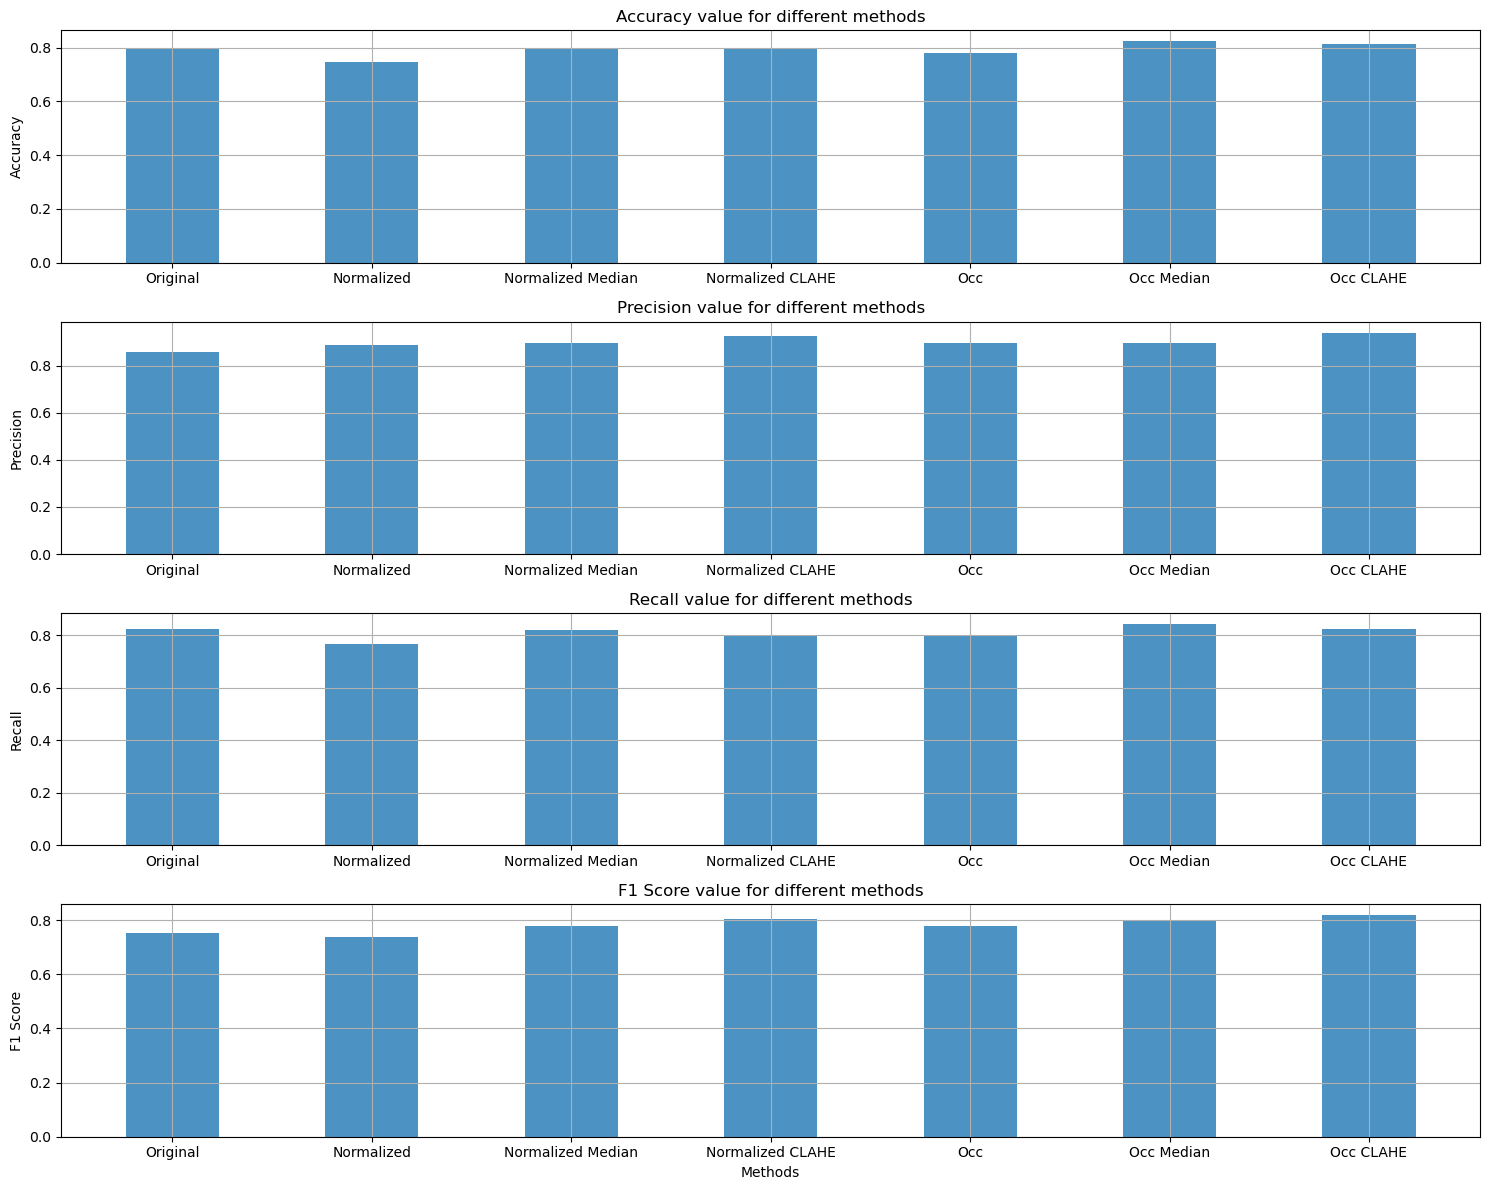

In [60]:
import matplotlib.pyplot as plt
import numpy as np

xlabels = ['Original', 'Normalized', 'Normalized Median', 'Normalized CLAHE', 'Occ', 'Occ Median', 'Occ CLAHE']

accuracy_arrays = [accuracy_0, accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6]
precision_arrays = [precision_0, precision_1, precision_2, precision_3, precision_4, precision_5, precision_6]
recall_arrays = [recall_0, recall_1, recall_2, recall_3, recall_4, recall_5, recall_6]
f1_arrays = [f1_0, f1_1, f1_2, f1_3, f1_4, f1_5, f1_6]

# Define bar positions
bar_width = 0.7
bar_positions = np.arange(len(xlabels)) * 1.5  # Adjust the spacing

# Create a subplot with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(15, 12))

# Plot accuracy
axs[0].bar(bar_positions, [array[-1] for array in accuracy_arrays], width=bar_width, align='center', alpha=0.8)
axs[0].set_title('Accuracy value for different methods')
axs[0].set_ylabel('Accuracy')
axs[0].grid()
axs[0].set_xticks(bar_positions)
axs[0].set_xticklabels(xlabels)

# Plot precision
axs[1].bar(bar_positions, [array[-1] for array in precision_arrays], width=bar_width, align='center', alpha=0.8)
axs[1].set_title('Precision value for different methods')
axs[1].set_ylabel('Precision')
axs[1].grid()
axs[1].set_xticks(bar_positions)
axs[1].set_xticklabels(xlabels)

# Plot recall
axs[2].bar(bar_positions, [array[-1] for array in recall_arrays], width=bar_width, align='center', alpha=0.8)
axs[2].set_title('Recall value for different methods')
axs[2].set_ylabel('Recall')
axs[2].grid()
axs[2].set_xticks(bar_positions)
axs[2].set_xticklabels(xlabels)

# Plot F1 Score
axs[3].bar(bar_positions, [array[-1] for array in f1_arrays], width=bar_width, align='center', alpha=0.8)
axs[3].set_title('F1 Score value for different methods')
axs[3].set_xlabel('Methods')
axs[3].set_ylabel('F1 Score')
axs[3].grid()
axs[3].set_xticks(bar_positions)
axs[3].set_xticklabels(xlabels)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [104]:
df_scores = pd.DataFrame()
df_scores['Methods'] = xlabels
df_scores['Accuracy'] = [array[-1] for array in accuracy_arrays]
df_scores['Precision'] = [array[-1] for array in precision_arrays]
df_scores['Recall'] = [array[-1] for array in recall_arrays]
df_scores['F1 Score'] = [array[-1] for array in f1_arrays]

df_scores.head(10)

,Methods,Accuracy,Precision,Recall,F1 Score
0,Original,0.796875,0.859384,0.823319,0.753182
1,Normalized,0.745536,0.886624,0.765841,0.738907
2,Normalized Median,0.799107,0.897782,0.819925,0.779948
3,Normalized CLAHE,0.799107,0.925489,0.798478,0.803882
4,Occ,0.779018,0.896628,0.797198,0.776884
5,Occ Median,0.823661,0.897122,0.841558,0.800075
6,Occ CLAHE,0.814732,0.940053,0.822361,0.817198
